In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Cleaning data
df["job_posted_date"]= pd.to_datetime(df["job_posted_date"])

In [2]:
df_usa = df[df['job_country']== 'United States'].copy()

In [6]:
df_usa['job_posted_month']= df_usa['job_posted_date']. dt.strftime('%B')


In [27]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [30]:
df_usa_pivot.reset_index(inplace=True)

In [31]:
df_usa_pivot['month_num']= pd.to_datetime(df_usa_pivot['job_posted_month'], format= '%B').dt.month
df_usa_pivot['month_num']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_num, dtype: int32

In [33]:
df_usa_pivot.sort_values('month_num', inplace=True)
df_usa_pivot.set_index('job_posted_month', inplace=True)

In [34]:
df_usa_pivot.drop(columns='month_num', inplace=True)

In [35]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [51]:
top_3= df_usa['job_title_short'].value_counts().head(3)
top_3= top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

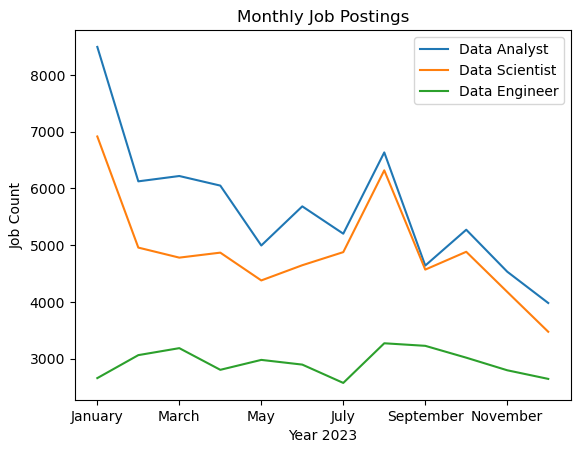

In [54]:
df_usa_pivot[top_3].plot(kind="line")

plt.title("Monthly Job Postings")
plt.xlabel('Year 2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [3]:
df_salary = df[pd.notna(df['salary_year_avg'])]

def new_salary(salary):
    return salary*1.03

df_salary['salary_year_avg'].apply(new_salary)

28        112785.00
77        144200.00
92        123600.00
100       235068.66
109        91670.00
            ...    
785624    143392.48
785641    154500.00
785648    228531.25
785682    162225.00
785692    162225.00
Name: salary_year_avg, Length: 22003, dtype: float64